In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# read RFM_clean.csv file
df = pd.read_csv("RFM_clean.csv")
df

,CustomerID,Frequency,Monetary,Recency
0,12346,2,0.00,326
1,12347,182,4310.00,2
2,12348,31,1797.24,75
3,12349,73,1757.55,19
4,12350,17,334.40,310
...,...,...,...,...
4367,18280,10,180.60,278
4368,18281,7,80.82,181
4369,18282,13,176.60,8
4370,18283,756,2094.88,4


In [21]:
# CustomerID column is used for the index of each rows
df = df.set_index("CustomerID")
df

,Frequency,Monetary,Recency
CustomerID,,,
12346,2,0.00,326
12347,182,4310.00,2
12348,31,1797.24,75
12349,73,1757.55,19
12350,17,334.40,310
...,...,...,...
18280,10,180.60,278
18281,7,80.82,181
18282,13,176.60,8


In [22]:
# check dimension of dataset
df.shape

(4372, 3)

In [23]:
# check if each row indicate unique customers
df.index.nunique()

4372

### Each rows in out dataframe are unique and total of 4327 are registered customers.

In [24]:
# Let's check how many customers did not contribute to revenue and how many have negative monetary
no_revenue = (df["Monetary"] == 0).sum()
print(f"Total of {no_revenue} customers didn't contributed to revenue during the period when data was collected.")

# Let's check how many customers got refund 
num_refunded = (df["Monetary"] < 0).sum()
print(f"\nTotal of {num_refunded} customer got refunded during the time period when data was collected.")

Total of 8 customers didn't contributed to revenue during the period when data was collected.

Total of 42 customer got refunded during the time period when data was collected.


In [25]:
# we would like to work with customer rows that contributed to the revenue
df[df["Monetary"] > 0].describe()

,Frequency,Monetary,Recency
count,4322.000000,4.322000e+03,4322.000000
mean,94.059695,1.923483e+03,90.343591
std,233.621415,8.263128e+03,99.133565
min,1.000000,1.776357e-15,1.000000
25%,18.000000,3.022925e+02,17.000000
50%,42.000000,6.575500e+02,49.500000
75%,102.750000,1.625740e+03,138.000000
max,7983.000000,2.794890e+05,374.000000


### The min value of monetary column is close to 0. We would like to exclude them too in our analysis of clustering

In [26]:
# We would like to work with customers who contributed to the revenue
df_rev = df[df["Monetary"] > 0.01]
df_rev.describe()

,Frequency,Monetary,Recency
count,4317.000000,4317.000000,4317.000000
mean,94.101459,1925.711131,90.370628
std,233.740563,8267.652986,99.157796
min,1.000000,2.900000,1.000000
25%,18.000000,302.700000,17.000000
50%,43.000000,658.260000,49.000000
75%,103.000000,1627.130000,138.000000
max,7983.000000,279489.020000,374.000000


### From the table above we can see that mean are greater than median for all columns in the observation. It implies that data are right skewed. It would be better if we transform these data using log to reduce the skewness.

In [27]:
# log-transformation of each features
df_rev_log = np.log(df_rev)
# summary statistics of revenue generating customer and their log-transformed features
df_rev_log.describe()

,Frequency,Monetary,Recency
count,4317.000000,4317.000000,4317.000000
mean,3.714344,6.569846,3.715897
std,1.314191,1.247226,1.460847
min,0.000000,1.064711,0.000000
25%,2.890372,5.712742,2.833213
50%,3.761200,6.489600,3.891820
75%,4.634729,7.394573,4.927254
max,8.985070,12.540718,5.924256


### After the transformation these data looks like to have almost similar median and mean. Since columns are not large in variance therefore we don't need to do any further transformation and can cluster them using this log-transformed data.

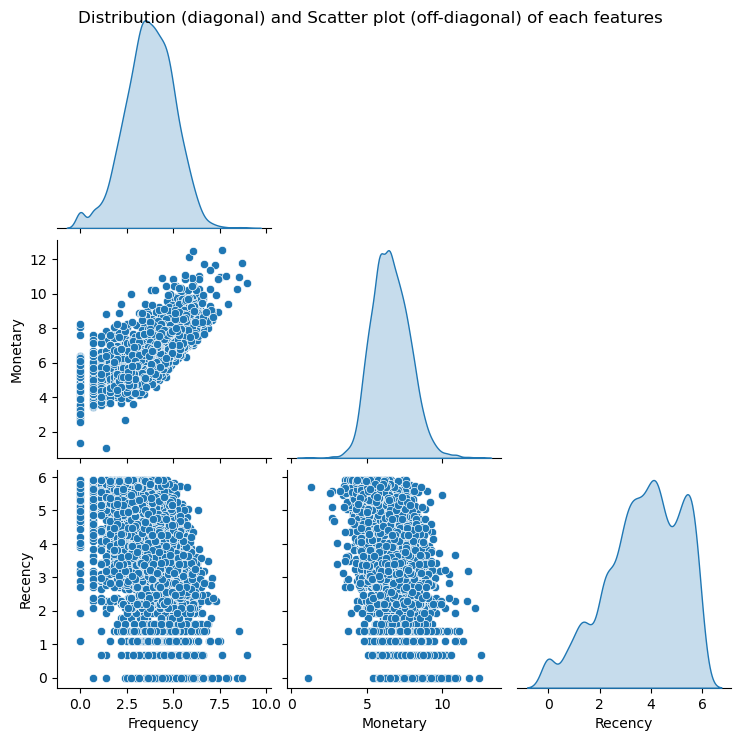

In [35]:
# distribution and scatter plot of each features
sns.pairplot(df_rev_log, diag_kind = "kde", corner = True)
plt.suptitle('Distribution (diagonal) and Scatter plot (off-diagonal) of each features')
plt.show()

In [36]:
# save the dataframe as csv file
df_rev_log.to_csv("RFM_preprocessed.csv", index = True)